# B''H

## House Prices - EDA

**Step 7: Analyze the dependent variable: SalePrice.**

**Key Takeaway:** 
- SalePrice does not follow a normal distribution
- The data is quite skewed to the right
- We ended up removing two outlier records

In [14]:
import os
import sys

import math

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

---
## Set the plot output sizes

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---
## Get project info

In [3]:
NOTEBOOKS_DIR = os.path.join(os.pardir)

print(os.path.abspath(NOTEBOOKS_DIR))

/home/laz/repos/springboard-mini-projects/notebooks


In [4]:
PROJ_ROOT = os.path.join(NOTEBOOKS_DIR,os.pardir)

print(os.path.abspath(PROJ_ROOT))

/home/laz/repos/springboard-mini-projects


In [5]:
# add the 'src' directory as one where we can import modules
SRC_DIR = os.path.join(PROJ_ROOT, 'src')
sys.path.append(SRC_DIR)

print(os.path.abspath(SRC_DIR))

/home/laz/repos/springboard-mini-projects/src


In [6]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf

---
### Import the data:

In [8]:
df_train = hf.read_csv(
    p_dir       = hf.DATA_INTERIM_DIR,
    p_file_name = 'df_train_step_04.csv',
    p_index_col = 'Id'
)

df_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQualRecode,ExterCondRecode,HeatingQCRecode,KitchenQualRecode
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,4,3,5,4
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,3,3,5,3
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,4,3,5,4
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,3,3,4,4
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,4,3,5,4


---
### Get descriptive statistics summary

In [9]:
df_train['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Plot histogram

/home/laz/anaconda3/envs/springboard-mini-projects/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


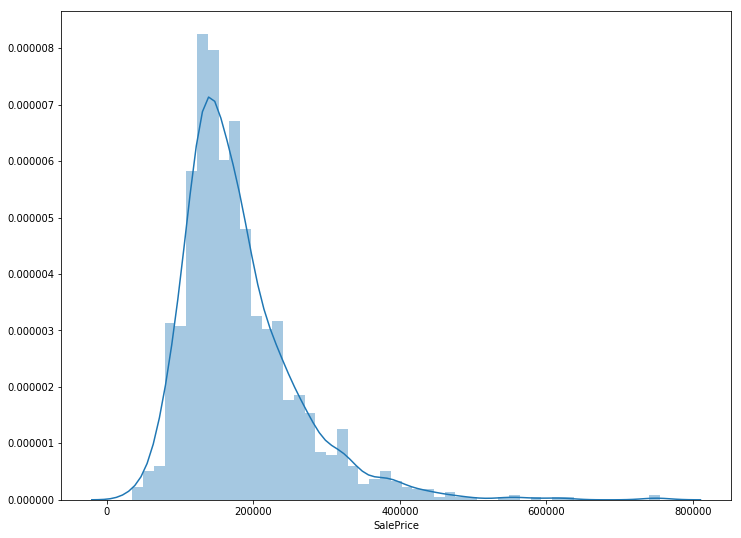

In [10]:
sns.distplot(df_train['SalePrice']);

### As can be seen the data is skewed in the right tail.

---
## Get the skewness and kurtosis

In [11]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.881943
Kurtosis: 6.529263


---
### Check the normality of the distribution using an ECDF

In [12]:
sale_price = df_train['SalePrice'].values

mu      = np.mean(sale_price)
sigma   = np.std(sale_price)

print("mean :", mu)
print("std  :", sigma)

mean : 180930.3947909527
std  : 79441.72530497766


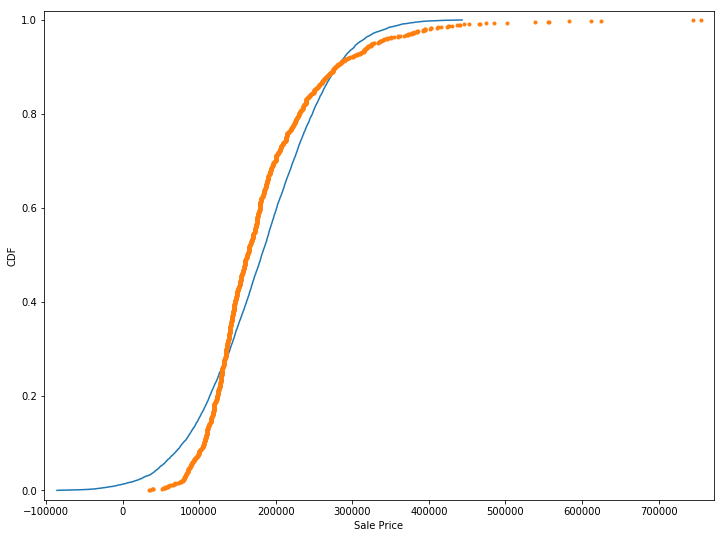

In [13]:
# Sample out of a normal distribution with this mu and sigma:
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(samples)
x, y             = hf.ecdf(sale_price)


_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Sale Price')
_ = plt.ylabel('CDF')


plt.show()

### ... clearly not following the normal curve.

---
### Let's check for outliers
- Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

### Univariate outlier test
- The primary concern here is to establish a threshold that defines an observation as an outlier. 
- To do so, we'll standardize the data. 
- In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [29]:
sale_price[:5]

array([208500, 181500, 223500, 140000, 250000])

In [30]:
# StandardScaler().fit_transform needs a 2d input so lets first add another dimension

# https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it

# Increase the dimension from 1D to 2D 
sale_price_2d = sale_price[:,np.newaxis]

sale_price_2d[:5]

array([[208500],
       [181500],
       [223500],
       [140000],
       [250000]])

In [31]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

saleprice_scaled_2d = StandardScaler().fit_transform(sale_price_2d)

saleprice_scaled_2d[:5]

/home/laz/anaconda3/envs/springboard-mini-projects/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       [-0.5152254 ],
       [ 0.86943738]])

In [35]:
saleprice_scaled = saleprice_scaled_2d[saleprice_scaled_2d[:,0].argsort()]

saleprice_scaled[:5]

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974]])

In [39]:
print('Outer range (low) of the distribution:')
print(saleprice_scaled[:10])

print('_______________________________________')

print('Outer range (high) of the distribution:')
print(saleprice_scaled[-10:])

Outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
_______________________________________
Outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Note: 
- Low range values are similar and not too far from 0.
- High range values are far from 0; the 7+ values are really out of range.

---
### Bivariate outlier visual test
- Lets once again look at the SalePrice against one of our select numerical independent variables; GrLivArea

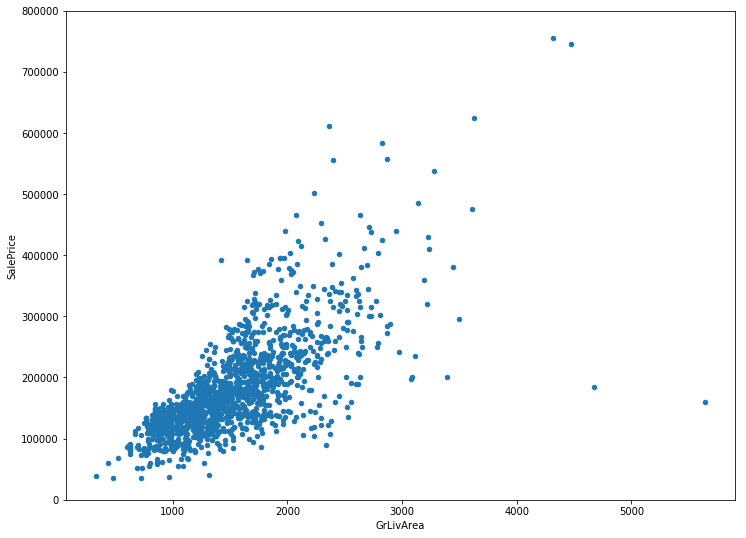

In [40]:
df_train.plot.scatter(
    x='GrLivArea', 
    y='SalePrice', 
    ylim=(0,800000)
)

### Note:
- Look at the two values where the ground living area is past 4,000 square feet yet the Sale Price is low 
- They look odd and misplaced. 
- We can (and should) do further analysis to see why this is the case (perhaps due to agricultural area etc.). 
- It seems pretty clear though that these two points are not representative of the typical case. 
- Therefore, we'll define them as outliers and delete them.

---

As can be seen below, these are actually Residential Low Density properties

In [57]:
df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 200000)].iloc[:, :10]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood
Id,,,,,,,,,,
524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards
1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards


In [60]:
rows_to_drop = df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 200000)].index

rows_to_drop

Int64Index([524, 1299], dtype='int64', name='Id')

In [61]:
df_train = df_train.drop(rows_to_drop)

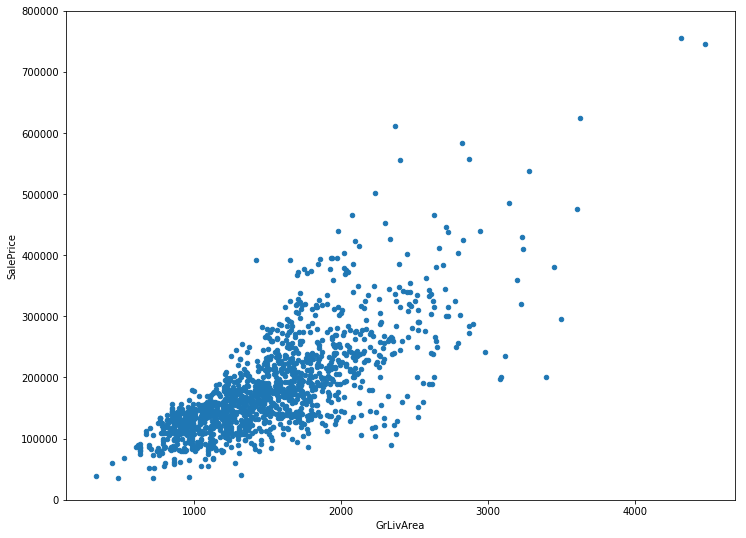

In [62]:
df_train.plot.scatter(
    x='GrLivArea', 
    y='SalePrice', 
    ylim=(0,800000)
)